In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,Embedding, LSTM
from keras.datasets import imdb
from keras.preprocessing import sequence

In [7]:
max_words = 10240
maxlen = 32

(x_train, y_train),(_, _) = imdb.load_data(num_words = max_words)

x_train = sequence.pad_sequences(x_train, maxlen = maxlen)

17464789/17464789 [==============================] - 0s 0us/step


In [8]:
print(y_train[:10])

model = Sequential()
model.add(Embedding(max_words, 16, input_length=maxlen))
model.add(LSTM(128))
model.add(Dense(1, activation= 'sigmoid' ))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics= ['acc'])

history = model.fit(x_train, y_train, batch_size=128, epochs=15, verbose=1)

[1 0 0 1 0 0 1 0 1 0]
Epoch 1/15
196/196 [==============================] - 26s 101ms/step - loss: 0.5484 - acc: 0.7090
Epoch 2/15
196/196 [==============================] - 20s 100ms/step - loss: 0.3843 - acc: 0.8282
Epoch 3/15
196/196 [==============================] - 21s 108ms/step - loss: 0.3336 - acc: 0.8549
Epoch 4/15
196/196 [==============================] - 22s 109ms/step - loss: 0.3008 - acc: 0.8733
Epoch 5/15
196/196 [==============================] - 20s 102ms/step - loss: 0.2773 - acc: 0.8882
Epoch 6/15
196/196 [==============================] - 19s 98ms/step - loss: 0.2559 - acc: 0.8975
Epoch 7/15
196/196 [==============================] - 21s 106ms/step - loss: 0.2328 - acc: 0.9090
Epoch 8/15
196/196 [==============================] - 21s 107ms/step - loss: 0.2055 - acc: 0.9213
Epoch 9/15
196/196 [==============================] - 23s 114ms/step - loss: 0.1739 - acc: 0.9358
Epoch 10/15
196/196 [==============================] - 22s 110ms/step - loss: 0.1463 - acc: 0.946

In [9]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 32, 16)            163840    
                                                                 
 lstm (LSTM)                 (None, 128)               74240     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 238209 (930.50 KB)
Trainable params: 238209 (930.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


Accuracy: % 98.46000075340271


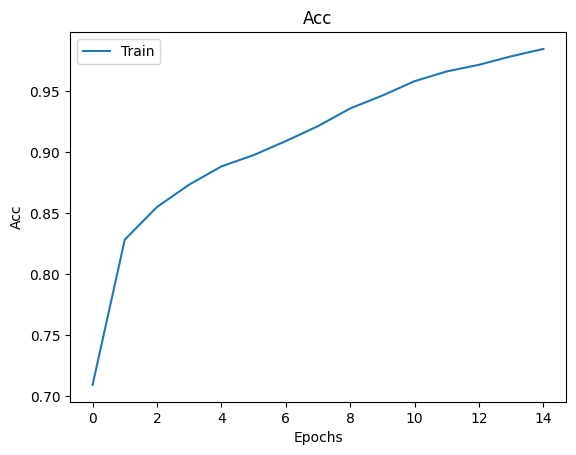

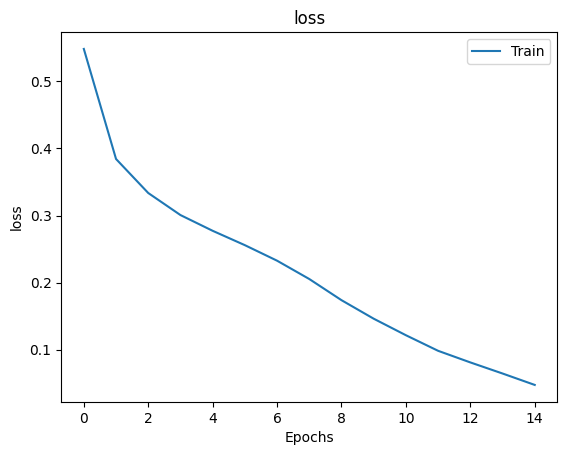

In [10]:
print("Accuracy: %",history.history["acc"][-1]*100)

plt.figure()
plt.plot(history.history["acc"], label = "Train")
plt.title("Acc")
plt.ylabel("Acc")
plt.xlabel("Epochs")
plt.legend()
plt.show()

plt.figure()
plt.plot(history.history["loss"], label = "Train")
plt.title("loss")
plt.ylabel("loss")
plt.xlabel("Epochs")
plt.legend()
plt.show()